In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro,kstest,normaltest
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.feature_selection import chi2,f_classif,f_regression
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")


## 1. Problem Statement

In [2]:
# A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
# The New Insurance Package Also Includes Covid Cover.
# The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
# The Insurance Was Offered To Some Of The Customers In 2019 And 
# The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
# The Data Is Provided For Almost 2000 Of Its Previous Customers And 
# You Are Required To Build An Intelligent Model That Can Predict 
# If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.

## 2.DataGathering

In [3]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
df1 = df.copy()
# df1

## 3.EDA

In [5]:
df1.info() #some features have categorical data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
df1.isna().sum() #no null value

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [7]:
df1.shape

(1987, 10)

### Unnamed: 0

In [8]:
 df1["Unnamed: 0"].nunique() # identical feature >> drop it

1987

### Age

In [9]:
df1["Age"].unique()

array([31, 34, 28, 25, 33, 26, 32, 29, 35, 30, 27], dtype=int64)

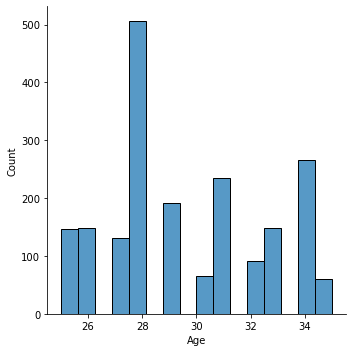

In [10]:
sns.displot(df1["Age"]) # not normally distributed

In [11]:
_,p_value = shapiro(df1["Age"])
print("p value : ",p_value)
print("*"*20)

if p_value > 0.05:
    print("normally distributed")
    
else:
    print("not normally distributed")

p value :  4.971090001830809e-30
********************
not normally distributed


<AxesSubplot:xlabel='Age', ylabel='count'>

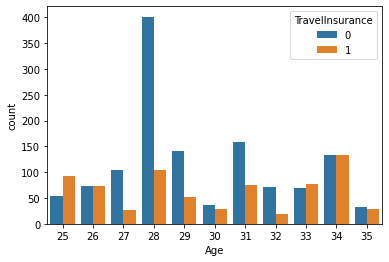

In [12]:
sns.countplot(df1["Age"],hue = df1["TravelInsurance"])


<AxesSubplot:xlabel='Age', ylabel='Density'>

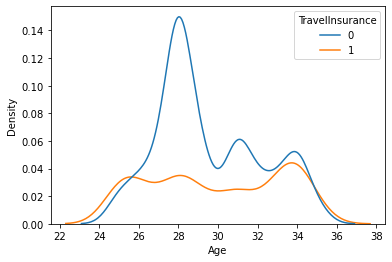

In [13]:
sns.kdeplot(df1["Age"],hue = df1["TravelInsurance"])


In [14]:
# insurance buyer in between 33 to 35  but not give exactly more info

### Employment Type

In [15]:
df1["Employment Type"].unique() # two categorical data

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

<AxesSubplot:xlabel='Employment Type', ylabel='count'>

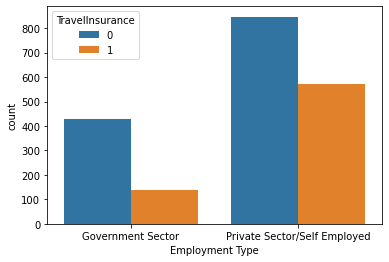

In [16]:
sns.countplot(x=df1["Employment Type"],hue = df1["TravelInsurance"] )

In [17]:
# Mostly the Private Sector / Self Employed has a tendency to buy more insurance

### GraduateOrNot

In [18]:
df1["GraduateOrNot"].unique()      # two categorical data

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='GraduateOrNot', ylabel='count'>

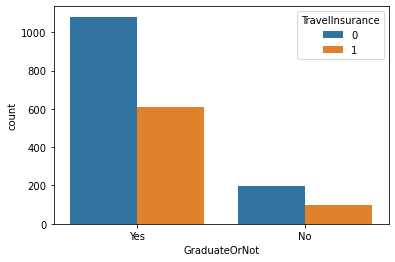

In [19]:
sns.countplot(x =df1["GraduateOrNot"],hue = df1["TravelInsurance"] )

In [20]:
# From GraduateOrNot perspective it seems that Graduated Person has a stronger preference towards TravelInsurance

### AnnualIncome

In [21]:
df1["AnnualIncome"].unique()

array([ 400000, 1250000,  500000,  700000, 1150000, 1300000, 1350000,
       1450000,  800000, 1400000,  850000, 1500000, 1050000,  350000,
       1100000,  600000,  900000,  550000,  300000,  750000, 1200000,
       1000000,  950000, 1700000, 1750000,  650000,  450000, 1650000,
       1800000, 1550000], dtype=int64)

<AxesSubplot:>

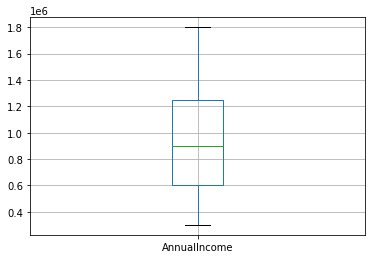

In [22]:
df1[["AnnualIncome"]].boxplot()  # no outliers

<AxesSubplot:xlabel='AnnualIncome', ylabel='Density'>

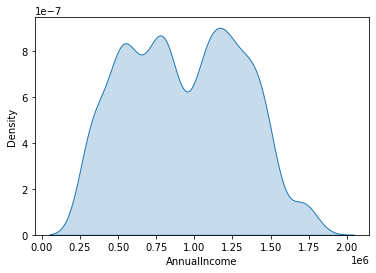

In [23]:
sns.kdeplot(df1["AnnualIncome"],fill = True)  #not normally distributed

In [24]:
_,p_value = shapiro(df1["AnnualIncome"])
print("p value : ",p_value)
print("*"*20)

if p_value > 0.05:
    print("normally distributed")
    
else:
    print("not normally distributed")

p value :  1.6780869299608356e-21
********************
not normally distributed


<Figure size 1440x720 with 0 Axes>

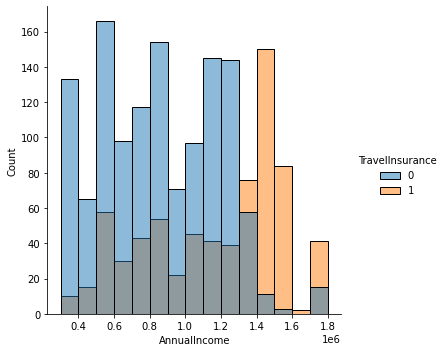

In [25]:
plt.figure(figsize=(20,10))
sns.displot(x =df1["AnnualIncome"],hue = df1["TravelInsurance"] )

<AxesSubplot:xlabel='AnnualIncome', ylabel='Density'>

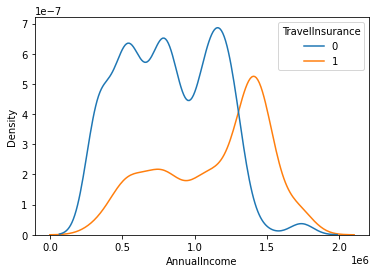

In [26]:
sns.kdeplot(x =df1["AnnualIncome"],hue = df1["TravelInsurance"] )

In [27]:
# The person who has annualIncome above 1.3 that will prefer to buy Insurance 

### FamilyMembers

In [28]:
df1["FamilyMembers"].unique()

array([6, 7, 4, 3, 8, 9, 5, 2], dtype=int64)

<AxesSubplot:xlabel='FamilyMembers'>

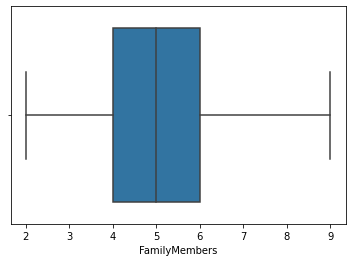

In [29]:
sns.boxplot(df1["FamilyMembers"])  # no outliers

<AxesSubplot:xlabel='FamilyMembers', ylabel='Density'>

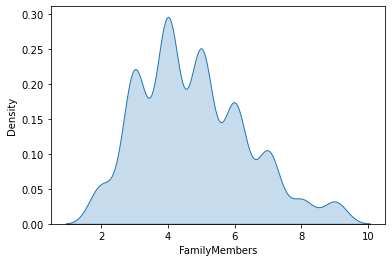

In [30]:
sns.kdeplot(df1["FamilyMembers"],fill= True) # not normally distributed

In [31]:
_,p_value = kstest(df1["FamilyMembers"],"norm")
print("p value : ",p_value)
print("*"*20)

if p_value > 0.05:
    print("normally distributed")
    
else:
    print("not normally distributed")

p value :  0.0
********************
not normally distributed


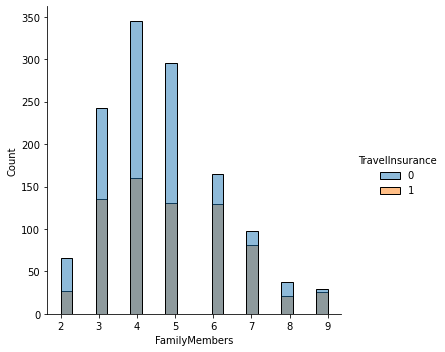

In [32]:
sns.displot(x= df1["FamilyMembers"],hue = df1["TravelInsurance"])

<AxesSubplot:xlabel='FamilyMembers', ylabel='Density'>

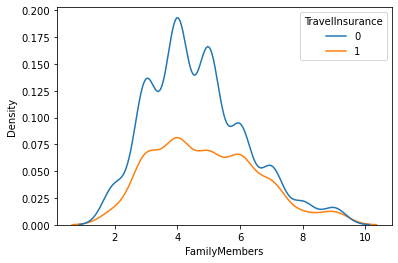

In [33]:
sns.kdeplot(x= df1["FamilyMembers"],hue = df1["TravelInsurance"])

In [34]:
# Mostly Insurance Buyer Has 3 to 7 Family Members

### ChronicDiseases

In [35]:
df1["ChronicDiseases"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='ChronicDiseases', ylabel='count'>

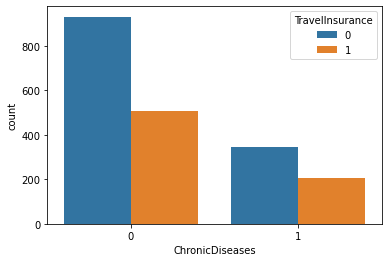

In [36]:
sns.countplot(df1["ChronicDiseases"],hue= df1["TravelInsurance"])

In [37]:
# From Chronic Disease Perspective shows that the Person with Chronic Disease tend not to buy the Insurance

### FrequentFlyer

In [38]:
df1["FrequentFlyer"].unique()  # two categorical data

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='FrequentFlyer', ylabel='count'>

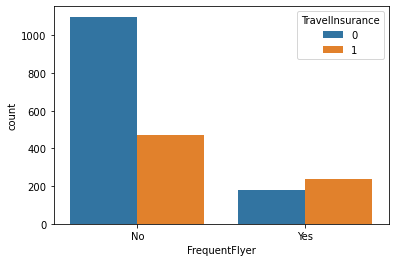

In [39]:
sns.countplot(x = df1["FrequentFlyer"],hue= df1["TravelInsurance"])

In [40]:
#FrequentFlyer Traveller has a tendency to buy more insurance

### EverTravelledAbroad

In [41]:
df1["EverTravelledAbroad"].unique()      # two categorical data

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='EverTravelledAbroad', ylabel='count'>

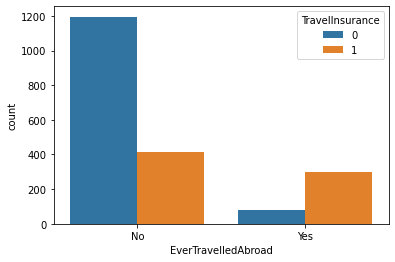

In [42]:
sns.countplot(x = df1["EverTravelledAbroad"],hue= df1["TravelInsurance"])

In [43]:
# The person who used to Travel Abroad is likely to buy More TravelInsurance

### TravelInsurance

In [44]:
df1["TravelInsurance"].unique()

array([0, 1], dtype=int64)

In [45]:
df1["TravelInsurance"].value_counts()       # imbalanced data

0    1277
1     710
Name: TravelInsurance, dtype: int64

## 4 Feature Engineering

### Unnamed: 0

In [46]:
df1.drop("Unnamed: 0",axis = 1,inplace = True)

In [47]:
df1.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


### Employment Type

In [48]:
ohe = OneHotEncoder()
array = ohe.fit_transform(df1[["Employment Type"]]).toarray()
df2 = pd.DataFrame(array,columns=df1["Employment Type"].unique())
df2.head()

,Government Sector,Private Sector/Self Employed
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [49]:
df_1 = df1.join(df2)
df_1.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector,Private Sector/Self Employed
0,31,Government Sector,Yes,400000,6,1,No,No,0,1.0,0.0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,0.0,1.0


In [50]:
df_1.drop(["Employment Type","Private Sector/Self Employed"],axis = 1,inplace = True)


In [51]:
df_1.head(2)

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector
0,31,Yes,400000,6,1,No,No,0,1.0
1,31,Yes,1250000,7,0,No,No,0,0.0


### GraduateOrNot

In [53]:
df_1["GraduateOrNot"] = df_1["GraduateOrNot"].replace({"Yes":1,"No":0})

### FrequentFlyer

In [54]:
df_1["FrequentFlyer"] = df_1["FrequentFlyer"].replace({"Yes":1,"No":0})
df_1.head(2)


,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector
0,31,1,400000,6,1,0,No,0,1.0
1,31,1,1250000,7,0,0,No,0,0.0


### EverTravelledAbroad

In [55]:
df_1["EverTravelledAbroad"] = df_1["EverTravelledAbroad"].replace({"Yes":1,"No":0})
df_1.head(2)


,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector
0,31,1,400000,6,1,0,0,0,1.0
1,31,1,1250000,7,0,0,0,0,0.0


In [56]:
x = df_1.drop('TravelInsurance',axis = 1)
y = df_1['TravelInsurance']

In [57]:
smt = SMOTE(sampling_strategy=0.8,k_neighbors=5,random_state=45)
x_sampled,y_sampled = smt.fit_resample(x,y)
y_sampled.value_counts()


0    1277
1    1021
Name: TravelInsurance, dtype: int64

In [58]:
y.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

## 5. Feature Selection

In [59]:
df_1.columns

Index(['Age', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'TravelInsurance', 'Government Sector'],
      dtype='object')

### Chi test

In [60]:
df_n = df_1[['GraduateOrNot','ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'TravelInsurance', 'Government Sector']]
# df_n

In [61]:
x = df_n.drop('TravelInsurance',axis = 1)
y = df_n['TravelInsurance']

In [62]:
ch1,p_value = chi2(x,y)
dfn = pd.DataFrame({"chi_value":ch1,"p_value":np.around(p_value,4)},index=x.columns)
dfn       #ChronicDiseases and GraduateOrNot have p value >0.05 (independent)

,chi_value,p_value
GraduateOrNot,0.105751,0.7450
ChronicDiseases,0.474787,0.4908
FrequentFlyer,84.578787,0.0000
EverTravelledAbroad,301.548960,0.0000
Government Sector,30.973784,0.0000


### Annova test

In [63]:
df_n = df_1[['Age','AnnualIncome', 'FamilyMembers','TravelInsurance']]
# df_n

In [64]:
x = df_n.drop("TravelInsurance",axis = 1)
y = df_n['TravelInsurance']

In [65]:
f_val,p_val = f_classif(x,y)
dfn = pd.DataFrame({"f_value":f_val,"p_value":np.around(p_val,4)},index=x.columns)
dfn     # age fval less so drop it

,f_value,p_value
Age,7.428382,0.0065
AnnualIncome,370.862293,0.0000
FamilyMembers,12.756575,0.0004


### vif

In [66]:
vif = pd.DataFrame()
df_0 = df_1.drop("TravelInsurance",axis = 1)
vif["featues"] = df_0.columns
vif["vif_factor"] = [variance_inflation_factor(df_0,i) for i in range(df_0.shape[1])]
vif      #vif of age greater so drop it

,featues,vif_factor
0,Age,19.682363
1,GraduateOrNot,6.902967
2,AnnualIncome,10.694230
3,FamilyMembers,9.193303
4,ChronicDiseases,1.388028
5,FrequentFlyer,1.482726
6,EverTravelledAbroad,1.641000
7,Government Sector,1.670108


<AxesSubplot:>

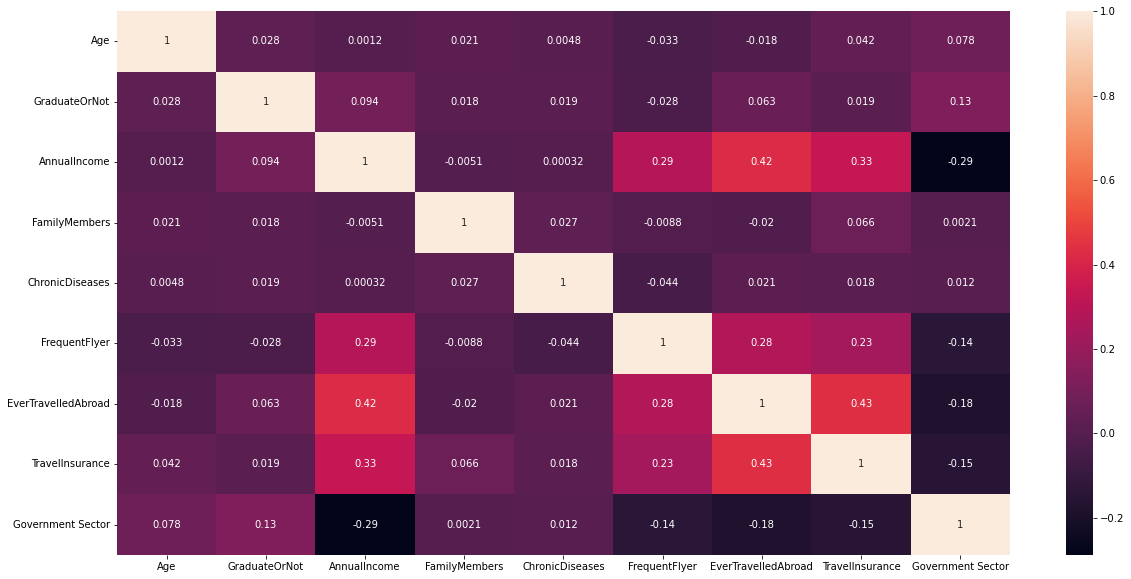

In [67]:
corr = df_1.corr(method="kendall")
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot=True)

## Evaluation with feature selection

In [68]:
x1 = df_1.drop(['TravelInsurance','Age'],axis = 1)
y1 = df_1['TravelInsurance']


In [69]:
y1.value_counts() # imbalance data

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [70]:
smt1 = SMOTE(sampling_strategy=0.8,k_neighbors=5,random_state=45)
x1_sampled,y1_sampled = smt1.fit_resample(x1,y1)
y1_sampled.value_counts() # balance

0    1277
1    1021
Name: TravelInsurance, dtype: int64

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x1_sampled,y1_sampled,test_size=0.25,random_state=45,stratify=y1_sampled)

### LogisticRegression

In [72]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [73]:
#training
y_pred_train = log_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[  0 957]
 [  0 766]]
accuracy :  0.4445734184561811
classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       957
           1       0.44      1.00      0.62       766

    accuracy                           0.44      1723
   macro avg       0.22      0.50      0.31      1723
weighted avg       0.20      0.44      0.27      1723



In [76]:
#testing
y_pred_test = log_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[  0 320]
 [  0 255]]
accuracy :  0.4434782608695652
classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.44      1.00      0.61       255

    accuracy                           0.44       575
   macro avg       0.22      0.50      0.31       575
weighted avg       0.20      0.44      0.27       575



In [82]:
#without balanced data
y.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [84]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [85]:
log_model.score(x_train,y_train)

0.6429530201342282

In [86]:
log_model.score(x_test,y_test)

0.641851106639839

### knn

In [87]:
# with balance data
x_train,x_test,y_train,y_test = train_test_split(x1_sampled,y1_sampled,test_size=0.25,random_state=45,stratify=y1_sampled)

In [88]:
knn_m = KNeighborsClassifier()
knn_m.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
knn_m.score(x_train,y_train)

0.8316889146836912

In [90]:
knn_m.score(x_test,y_test)

0.7739130434782608

In [91]:
#without balanced data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [92]:
knn_m = KNeighborsClassifier()
knn_m.fit(x_train,y_train)
knn_m.score(x_train,y_train)

0.8389261744966443

In [93]:
knn_m.score(x_test,y_test)

0.8209255533199196

### hyperparameter

### RandomizedSearchCV

In [94]:
# with balance data
x_train,x_test,y_train,y_test = train_test_split(x1_sampled,y1_sampled,test_size=0.25,random_state=45,stratify=y1_sampled)

In [107]:
knn_rm = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,20),
            "p" : [1,2]}
rmcv = RandomizedSearchCV(knn_rm,parameter,cv =5)
rmcv.fit(x_train,y_train)
rmcv.best_estimator_

KNeighborsClassifier(n_neighbors=16, p=1)

In [108]:
knn_rm = KNeighborsClassifier(n_neighbors=16, p=1)
knn_rm.fit(x_train,y_train)
knn_rm.score(x_train,y_train)

0.7846778874056878

In [109]:
knn_rm.score(x_test,y_test)

0.7843478260869565

In [145]:
#without balanced data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [160]:
knn_rm = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,20),
            "p" : [1,2]}
rmcv = RandomizedSearchCV(knn_rm,parameter,cv =5)
rmcv.fit(x_train,y_train)
rmcv.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1)

In [161]:
knn_rm = KNeighborsClassifier(n_neighbors=10,p=1)
knn_rm.fit(x_train,y_train)
knn_rm.score(x_train,y_train)

0.8208053691275168

In [162]:
knn_rm.score(x_test,y_test)

0.8269617706237424

In [163]:
# with imbalanced data accuracy increase So use without balacing data

In [167]:
#with imbalanced data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

### GridSearchCV

In [142]:
knn_gscv = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,10),
            "p" : [1,2]}
gscv = GridSearchCV(knn_gscv,parameter,cv =5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=6, p=1)

In [143]:
knn_gs = KNeighborsClassifier(n_neighbors=6, p=1)
knn_gs.fit(x_train,y_train)
knn_gs.score(x_train,y_train)

0.8342281879194631

In [144]:
knn_gs.score(x_test,y_test)

0.8390342052313883

### DecisionTree

In [168]:
dt_m = DecisionTreeClassifier()
dt_m.fit(x_train,y_train)
dt_m.score(x_train,y_train)

0.8738255033557047

In [169]:
dt_m.score(x_test,y_test)

0.8229376257545271

### RandomizedSearchCV

In [183]:
dt_rm =DecisionTreeClassifier()
parameter = {"criterion" : ["gini", "entropy"],
            "max_depth" : np.arange(3,10),
    "min_samples_split" : np.arange(3,20),
    "min_samples_leaf" : np.arange(3,20)}
rmcv = RandomizedSearchCV(dt_rm,parameter,cv =5)
rmcv.fit(x_train,y_train)
rmcv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=5)

In [184]:
dt_rm =DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=5)
dt_rm.fit(x_train,y_train)
dt_rm.score(x_train,y_train)

0.8315436241610739

In [185]:
dt_rm.score(x_test,y_test)

0.8490945674044266

### GridSearchCV

In [189]:
dt_gm =DecisionTreeClassifier()
parameter = {"criterion" : ["gini", "entropy"],
            "max_depth" : np.arange(3,10),
    "min_samples_split" : np.arange(3,20),
    "min_samples_leaf" : np.arange(3,20)}
gscv = GridSearchCV(dt_rm,parameter,cv =5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

In [190]:
dt_gm =DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)
dt_gm.fit(x_train,y_train)
dt_gm.score(x_train,y_train)

0.8315436241610739

In [191]:
dt_gm.score(x_test,y_test)

0.8490945674044266

## 6 Model Trainng

### split data

In [192]:
# balanced data

In [193]:
x = df_1.drop("TravelInsurance",axis = 1)
y = df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled ,test_size=0.25,random_state=45,stratify=y_sampled)

## 7. Evaluation

In [194]:
# without Feature selection

## LogisticRegression

In [195]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [196]:
#training
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[  0 957]
 [  0 766]]
accuracy :  0.4445734184561811
classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       957
           1       0.44      1.00      0.62       766

    accuracy                           0.44      1723
   macro avg       0.22      0.50      0.31      1723
weighted avg       0.20      0.44      0.27      1723



In [197]:
#testing
y_pred_test = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[  0 320]
 [  0 255]]
accuracy :  0.4434782608695652
classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.44      1.00      0.61       255

    accuracy                           0.44       575
   macro avg       0.22      0.50      0.31       575
weighted avg       0.20      0.44      0.27       575



In [198]:
# imbalanced data
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.25,random_state=45,stratify=y)

In [199]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
logistic_model.score(x_train,y_train)

0.6429530201342282

In [200]:
logistic_model.score(x_test,y_test)

0.641851106639839

In [201]:
# with feature selection

In [202]:
lr_model = LogisticRegression()
sfs = SequentialFeatureSelector(lr_model,k_features=7,forward=True,cv = 5,n_jobs=-1)
sfs.fit(x_train,y_train)
df_0 = pd.DataFrame(sfs.subsets_).T
df_0

,feature_idx,cv_scores,avg_score,feature_names
1,"(6,)","[0.7550335570469798, 0.7583892617449665, 0.751...",0.748993,"(EverTravelledAbroad,)"
2,"(0, 6)","[0.7550335570469798, 0.7583892617449665, 0.751...",0.748993,"(Age, EverTravelledAbroad)"
3,"(0, 5, 6)","[0.7550335570469798, 0.7651006711409396, 0.751...",0.750336,"(Age, FrequentFlyer, EverTravelledAbroad)"
4,"(0, 3, 5, 6)","[0.7550335570469798, 0.7651006711409396, 0.761...",0.755034,"(Age, FamilyMembers, FrequentFlyer, EverTravel..."
5,"(0, 3, 4, 5, 6)","[0.7550335570469798, 0.7651006711409396, 0.761...",0.755034,"(Age, FamilyMembers, ChronicDiseases, Frequent..."
6,"(0, 1, 3, 4, 5, 6)","[0.7550335570469798, 0.7651006711409396, 0.761...",0.754362,"(Age, GraduateOrNot, FamilyMembers, ChronicDis..."
7,"(0, 1, 3, 4, 5, 6, 7)","[0.7516778523489933, 0.7550335570469798, 0.758...",0.748993,"(Age, GraduateOrNot, FamilyMembers, ChronicDis..."


In [203]:
lr_model = LogisticRegression()
sfs = SequentialFeatureSelector(lr_model,k_features=7,forward=True,cv = 5,n_jobs=-1)
sfs.fit(x_test,y_test)
df_0 = pd.DataFrame(sfs.subsets_).T
df_0

,feature_idx,cv_scores,avg_score,feature_names
1,"(6,)","[0.74, 0.73, 0.8080808080808081, 0.74747474747...",0.758646,"(EverTravelledAbroad,)"
2,"(0, 6)","[0.74, 0.73, 0.8080808080808081, 0.74747474747...",0.758646,"(Age, EverTravelledAbroad)"
3,"(0, 5, 6)","[0.74, 0.74, 0.8080808080808081, 0.74747474747...",0.760646,"(Age, FrequentFlyer, EverTravelledAbroad)"
4,"(0, 4, 5, 6)","[0.74, 0.73, 0.8080808080808081, 0.74747474747...",0.758646,"(Age, ChronicDiseases, FrequentFlyer, EverTrav..."
5,"(0, 3, 4, 5, 6)","[0.73, 0.74, 0.7878787878787878, 0.74747474747...",0.758646,"(Age, FamilyMembers, ChronicDiseases, Frequent..."
6,"(0, 1, 3, 4, 5, 6)","[0.73, 0.74, 0.7777777777777778, 0.74747474747...",0.756626,"(Age, GraduateOrNot, FamilyMembers, ChronicDis..."
7,"(0, 1, 3, 4, 5, 6, 7)","[0.71, 0.71, 0.7575757575757576, 0.74747474747...",0.736525,"(Age, GraduateOrNot, FamilyMembers, ChronicDis..."


## knn

In [204]:
#without feature Selection

In [205]:
# with balance data
x = df_1.drop("TravelInsurance",axis = 1)
y = df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.25,random_state=45,stratify=y_sampled)

In [206]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [209]:
#training
y_pred_train = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[878  79]
 [200 566]]
accuracy :  0.8380731282646546
classification report
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       957
           1       0.88      0.74      0.80       766

    accuracy                           0.84      1723
   macro avg       0.85      0.83      0.83      1723
weighted avg       0.84      0.84      0.84      1723



In [210]:
#testing
y_pred_test =knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[274  46]
 [ 76 179]]
accuracy :  0.7878260869565218
classification report
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       320
           1       0.80      0.70      0.75       255

    accuracy                           0.79       575
   macro avg       0.79      0.78      0.78       575
weighted avg       0.79      0.79      0.79       575



In [303]:
# imbalanced data
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.25,random_state=45,stratify=y)

In [212]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)


KNeighborsClassifier()

In [213]:
knn_model.score(x_train,y_train)


0.8463087248322148

In [214]:
knn_model.score(x_test,y_test)

0.8148893360160966

In [215]:
# with feature selection
knn_cl = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn_cl,k_features=7,forward=True,cv =5,n_jobs=-1)
sfs.fit(x_train,y_train)
df_0 = pd.DataFrame(sfs.subsets_).T
df_0

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)","[0.7315436241610739, 0.697986577181208, 0.7483...",0.742953,"(AnnualIncome,)"
2,"(2, 7)","[0.7416107382550335, 0.7516778523489933, 0.761...",0.760403,"(AnnualIncome, Government Sector)"
3,"(2, 3, 7)","[0.7684563758389261, 0.7416107382550335, 0.761...",0.763758,"(AnnualIncome, FamilyMembers, Government Sector)"
4,"(0, 2, 3, 7)","[0.785234899328859, 0.7718120805369127, 0.7953...",0.783893,"(Age, AnnualIncome, FamilyMembers, Government ..."
5,"(0, 2, 3, 4, 7)","[0.785234899328859, 0.785234899328859, 0.79865...",0.791946,"(Age, AnnualIncome, FamilyMembers, ChronicDise..."
6,"(0, 2, 3, 4, 6, 7)","[0.785234899328859, 0.7818791946308725, 0.8020...",0.792617,"(Age, AnnualIncome, FamilyMembers, ChronicDise..."
7,"(0, 1, 2, 3, 4, 6, 7)","[0.7919463087248322, 0.7785234899328859, 0.802...",0.793289,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."


In [216]:
# with imbaanced data accuracy increase So use without balacing data

### RandomSearchCV

In [221]:
knn_rmcv = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,20),
            "p" : [1,2]}
rmcv = RandomizedSearchCV(knn_rmcv,parameter,cv =5)
rmcv.fit(x_train,y_train)
rmcv.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=1)

In [222]:
knn_clf1 = KNeighborsClassifier(n_neighbors=4, p=1)
knn_clf1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [223]:
#training
y_pred_train = knn_clf1.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[942  16]
 [204 328]]
accuracy :  0.8523489932885906
classification report
               precision    recall  f1-score   support

           0       0.82      0.98      0.90       958
           1       0.95      0.62      0.75       532

    accuracy                           0.85      1490
   macro avg       0.89      0.80      0.82      1490
weighted avg       0.87      0.85      0.84      1490



In [224]:
#testing
y_pred_test =knn_clf1.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[304  15]
 [ 69 109]]
accuracy :  0.8309859154929577
classification report
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       319
           1       0.88      0.61      0.72       178

    accuracy                           0.83       497
   macro avg       0.85      0.78      0.80       497
weighted avg       0.84      0.83      0.82       497



In [225]:
# with feature selection
knn_cl = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,20),
            "p" : [1,2]}
rmcv = RandomizedSearchCV(knn_cl,parameter,cv =5)

sfs = SequentialFeatureSelector(rmcv,k_features=7,forward=True,cv =5,n_jobs=-1)
sfs.fit(x_train,y_train)
df_0 = pd.DataFrame(sfs.subsets_).T
df_0

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)","[0.7583892617449665, 0.7651006711409396, 0.755...",0.765772,"(AnnualIncome,)"
2,"(2, 3)","[0.7919463087248322, 0.7751677852348994, 0.781...",0.787919,"(AnnualIncome, FamilyMembers)"
3,"(0, 2, 3)","[0.8053691275167785, 0.8221476510067114, 0.815...",0.806711,"(Age, AnnualIncome, FamilyMembers)"
4,"(0, 2, 3, 5)","[0.7885906040268457, 0.8120805369127517, 0.808...",0.808054,"(Age, AnnualIncome, FamilyMembers, FrequentFlyer)"
5,"(0, 2, 3, 5, 6)","[0.7919463087248322, 0.8221476510067114, 0.812...",0.809396,"(Age, AnnualIncome, FamilyMembers, FrequentFly..."
6,"(0, 1, 2, 3, 5, 6)","[0.7919463087248322, 0.8154362416107382, 0.815...",0.807383,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."
7,"(0, 1, 2, 3, 5, 6, 7)","[0.802013422818792, 0.7986577181208053, 0.8187...",0.808054,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."


### GridSearchCV

In [304]:
knn_gscv = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,10),
            "p" : [1,2]}
gscv = GridSearchCV(knn_gscv,parameter,cv = 5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2]})

In [305]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=6, p=1)

In [306]:
knn_gscv = KNeighborsClassifier(n_neighbors=6, p=1)
knn_gscv.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [307]:
#training
y_pred_train = knn_gscv.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[933  25]
 [224 308]]
accuracy :  0.8328859060402685
classification report
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       958
           1       0.92      0.58      0.71       532

    accuracy                           0.83      1490
   macro avg       0.87      0.78      0.80      1490
weighted avg       0.85      0.83      0.82      1490



In [308]:
#testing
y_pred_test = knn_gscv.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[306  13]
 [ 69 109]]
accuracy :  0.8350100603621731
classification report
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       319
           1       0.89      0.61      0.73       178

    accuracy                           0.84       497
   macro avg       0.85      0.79      0.80       497
weighted avg       0.84      0.84      0.83       497



### Using Stander Scaler

In [226]:
std_scalar = StandardScaler()
std_array = std_scalar.fit_transform(df_1[["AnnualIncome"]])
std_df = pd.DataFrame(std_array,columns=["AnnualIncomenew"])
std_df.head(3)

,AnnualIncomenew
0,-1.414061
1,0.842012
2,-1.148641


In [227]:
df_2 = df_1.join(std_df)
df_2.drop("AnnualIncome",axis =1)

,Age,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector,AnnualIncomenew
0,31,1,6,1,0,0,0,1.0,-1.414061
1,31,1,7,0,0,0,0,0.0,0.842012
2,34,1,4,1,0,0,1,0.0,-1.148641
3,28,1,3,1,0,0,0,0.0,-0.617800
4,28,1,8,1,1,0,0,0.0,-0.617800
...,...,...,...,...,...,...,...,...,...
1982,33,1,4,0,1,1,1,0.0,1.505563
1983,28,1,5,1,0,1,0,0.0,2.169114
1984,28,1,6,1,0,0,0,0.0,0.576591
1985,34,1,6,0,1,1,1,0.0,0.178461


In [228]:
x = df_2.drop("TravelInsurance",axis = 1)
y = df_2["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [229]:
knn_clf1 = KNeighborsClassifier()
knn_clf1.fit(x_train,y_train)

KNeighborsClassifier()

In [230]:
#training
y_pred_train = knn_clf1.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[912  46]
 [183 349]]
accuracy :  0.8463087248322148
classification report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       958
           1       0.88      0.66      0.75       532

    accuracy                           0.85      1490
   macro avg       0.86      0.80      0.82      1490
weighted avg       0.85      0.85      0.84      1490



In [231]:
#testing
y_pred_test = knn_clf1.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[290  29]
 [ 63 115]]
accuracy :  0.8148893360160966
classification report
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       319
           1       0.80      0.65      0.71       178

    accuracy                           0.81       497
   macro avg       0.81      0.78      0.79       497
weighted avg       0.81      0.81      0.81       497



In [232]:
# with Feature selection
knn_cl = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn_cl,k_features=7,forward=False,cv =5,n_jobs=-1)
sfs.fit(x_train,y_train)
df_0 = pd.DataFrame(sfs.subsets_).T
df_0

,feature_idx,cv_scores,avg_score,feature_names
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.7986577181208053, 0.7684563758389261, 0.798...",0.791275,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."
8,"(0, 1, 2, 3, 4, 5, 7, 8)","[0.802013422818792, 0.7751677852348994, 0.7986...",0.79396,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."
7,"(0, 1, 2, 3, 4, 5, 8)","[0.802013422818792, 0.7684563758389261, 0.8053...",0.794631,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."


## HyperParameter Tunnig

### GridSearchCV

In [233]:
knn_gscv = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,10),
            "p" : [1,2]}
gscv = GridSearchCV(knn_gscv,parameter,cv =5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=6, p=1)

In [234]:
knn_clf1 = KNeighborsClassifier(n_neighbors=6, p=1)
knn_clf1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [235]:
#training
y_pred_train = knn_clf1.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[933  25]
 [224 308]]
accuracy :  0.8328859060402685
classification report
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       958
           1       0.92      0.58      0.71       532

    accuracy                           0.83      1490
   macro avg       0.87      0.78      0.80      1490
weighted avg       0.85      0.83      0.82      1490



In [236]:
#testing
y_pred_test = knn_clf1.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[306  13]
 [ 69 109]]
accuracy :  0.8350100603621731
classification report
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       319
           1       0.89      0.61      0.73       178

    accuracy                           0.84       497
   macro avg       0.85      0.79      0.80       497
weighted avg       0.84      0.84      0.83       497



### RandomizedSearchCV

In [238]:
knn_rmcv = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,10),
            "p" : [1,2]}
rmcv = RandomizedSearchCV(knn_gscv,parameter,cv =5)
rmcv.fit(x_train,y_train)
rmcv.best_estimator_

KNeighborsClassifier(n_neighbors=4, p=1)

In [239]:
knn_clf1 = KNeighborsClassifier(n_neighbors=4, p=1)
knn_clf1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [240]:
#training
y_pred_train = knn_clf1.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[942  16]
 [204 328]]
accuracy :  0.8523489932885906
classification report
               precision    recall  f1-score   support

           0       0.82      0.98      0.90       958
           1       0.95      0.62      0.75       532

    accuracy                           0.85      1490
   macro avg       0.89      0.80      0.82      1490
weighted avg       0.87      0.85      0.84      1490



In [241]:
#testing
y_pred_test = knn_clf1.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[304  15]
 [ 69 109]]
accuracy :  0.8309859154929577
classification report
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       319
           1       0.88      0.61      0.72       178

    accuracy                           0.83       497
   macro avg       0.85      0.78      0.80       497
weighted avg       0.84      0.83      0.82       497



## DecisionTree

In [242]:
# without feature selection

In [243]:
x = df_1.drop("TravelInsurance",axis = 1)
y = df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [244]:
# without feature selection
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [245]:
#training
y_pred_train = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[954   4]
 [109 423]]
accuracy :  0.9241610738255034
classification report
               precision    recall  f1-score   support

           0       0.90      1.00      0.94       958
           1       0.99      0.80      0.88       532

    accuracy                           0.92      1490
   macro avg       0.94      0.90      0.91      1490
weighted avg       0.93      0.92      0.92      1490



In [246]:
#testing
y_pred_test = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[271  48]
 [ 52 126]]
accuracy :  0.7987927565392354
classification report
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       319
           1       0.72      0.71      0.72       178

    accuracy                           0.80       497
   macro avg       0.78      0.78      0.78       497
weighted avg       0.80      0.80      0.80       497



## Hyperparameter tunnig

### GridSearchCV

In [247]:
dt_gscv = DecisionTreeClassifier()
parameter = {"criterion" : ["gini", "entropy"],
            "max_depth" : np.arange(3,10),
    "min_samples_split" : np.arange(3,20),
    "min_samples_leaf" : np.arange(3,20)}
gscv = GridSearchCV(dt_gscv,parameter,cv = 5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

In [248]:
dt_gscv = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)
dt_gscv.fit(x_train,y_train)
dt_gscv.score(x_train,y_train)

0.8315436241610739

In [249]:
dt_gscv.score(x_test,y_test)

0.8490945674044266

In [250]:
# with feature selection

In [251]:
# dt_model = DecisionTreeClassifier()
# parameter = {"criterion" : ["gini", "entropy"],
#             "max_depth" : np.arange(3,10),
#     "min_samples_split" : np.arange(3,20),
#     "min_samples_leaf" : np.arange(3,20)}
# gscv_dt = GridSearchCV(dt_model,parameter,cv = 5)
# sfs = SequentialFeatureSelector(gscv_dt,k_features=7,forward=False,cv=5,n_jobs=-1)
# sfs.fit(x_train,y_train)
# df_0 = pd.DataFrame(sfs.subsets_).T

In [252]:
#with balancing data
x = df_1.drop("TravelInsurance",axis = 1)
y = df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.25,random_state=45,stratify=y_sampled)

In [253]:
dt_gscv = DecisionTreeClassifier()
parameter = {"criterion" : ["gini", "entropy"],
            "max_depth" : np.arange(3,10),
    "min_samples_split" : np.arange(3,20),
    "min_samples_leaf" : np.arange(3,20)}
gscv = GridSearchCV(dt_gscv,parameter,cv = 5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=6)

In [254]:
dt_gscv = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=6)
dt_gscv.fit(x_train,y_train)
dt_gscv.score(x_train,y_train)

0.799767846778874

In [255]:
dt_gscv.score(x_test,y_test)

0.8069565217391305

In [256]:
# using imbalance data accuracy increase so use imbalance data

### RandomizedSearchCV

In [257]:
# with imbalaced data
x = df_1.drop("TravelInsurance",axis = 1)
y = df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [261]:
dt_rmcv = DecisionTreeClassifier()
parameter = {"criterion" : ["gini", "entropy"],
            "max_depth" : np.arange(3,10),
    "min_samples_split" : np.arange(3,20),
    "min_samples_leaf" : np.arange(3,20)}
rmcv = RandomizedSearchCV(dt_gscv,parameter,cv = 5)
rmcv.fit(x_train,y_train)
rmcv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=17, min_samples_split=6)

In [262]:
dt_rmcv = DecisionTreeClassifier(max_depth=7, min_samples_leaf=17, min_samples_split=6)
dt_rmcv.fit(x_train,y_train)
dt_rmcv.score(x_train,y_train)

0.8281879194630872

In [263]:
dt_rmcv.score(x_test,y_test)

0.8470824949698189

### Post  Purning

In [264]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [265]:
dic = dt.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = dic["ccp_alphas"]
# ccp_alpha_list

In [266]:
train_list = []
test_list = []

for ccp_alpha_v in ccp_alpha_list:
    dt_cl = DecisionTreeClassifier(ccp_alpha=ccp_alpha_v,random_state=45)
    dt_cl.fit(x_train,y_train)
    
    train_list.append(dt_cl.score(x_train,y_train))
    test_list.append(dt_cl.score(x_test,y_test))
    
# test_list

In [267]:
np.where(test_list == max(test_list))

(array([179, 180], dtype=int64),)

In [268]:
ccp_alpha_list[180]

0.025776569403111793

In [269]:
dt_cl = DecisionTreeClassifier(ccp_alpha=ccp_alpha_list[180],random_state=45)
dt_cl.fit(x_train,y_train)
dt_cl.score(x_train,y_train)

0.8248322147651007

In [270]:
dt_cl.score(x_test,y_test)

0.8511066398390342

## RandomForest

In [271]:
# without feature selection

In [272]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [273]:
#training
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[933  25]
 [ 88 444]]
accuracy :  0.9241610738255034
classification report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       958
           1       0.95      0.83      0.89       532

    accuracy                           0.92      1490
   macro avg       0.93      0.90      0.92      1490
weighted avg       0.93      0.92      0.92      1490



In [274]:
#testing
y_pred_test = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[274  45]
 [ 55 123]]
accuracy :  0.7987927565392354
classification report
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       319
           1       0.73      0.69      0.71       178

    accuracy                           0.80       497
   macro avg       0.78      0.77      0.78       497
weighted avg       0.80      0.80      0.80       497



In [275]:
# with feature selection

rf = RandomForestClassifier()
sfs = SequentialFeatureSelector(rf,k_features=7,forward=True,cv=5,n_jobs=-1)
sfs.fit(x_train,y_train)
df_0 = pd.DataFrame(sfs.subsets_).T
df_0

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)","[0.785234899328859, 0.785234899328859, 0.79530...",0.785906,"(AnnualIncome,)"
2,"(1, 2)","[0.7818791946308725, 0.7818791946308725, 0.791...",0.784564,"(GraduateOrNot, AnnualIncome)"
3,"(1, 2, 3)","[0.7919463087248322, 0.8053691275167785, 0.775...",0.785906,"(GraduateOrNot, AnnualIncome, FamilyMembers)"
4,"(0, 1, 2, 3)","[0.7684563758389261, 0.7953020134228188, 0.805...",0.785906,"(Age, GraduateOrNot, AnnualIncome, FamilyMembers)"
5,"(0, 1, 2, 3, 6)","[0.7751677852348994, 0.7885906040268457, 0.805...",0.787919,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."
6,"(0, 1, 2, 3, 6, 7)","[0.7684563758389261, 0.7718120805369127, 0.815...",0.788591,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."
7,"(0, 1, 2, 3, 4, 6, 7)","[0.7684563758389261, 0.7785234899328859, 0.822...",0.791275,"(Age, GraduateOrNot, AnnualIncome, FamilyMembe..."


### Hyperparameter Tunning

### GridSearchCV

In [276]:
# rf = RandomForestClassifier()
# parameter = {"n_estimators":np.arange(10,20),
#                  "criterion":["gini","entropy"],
#                  "max_depth" :np.arange(4,10),
#                  "min_samples_split":np.arange(3,10),
#                  "min_samples_leaf":np.arange(3,10),
#                  "max_features":["sqrt", "log2"],
#                  "random_state":[41,42,43,44,45],
#                 "oob_score":[True]}
# gscv = GridSearchCV(rf,parameter,cv = 5)
# gscv.fit(x_train,y_train)
# gscv.best_estimator_

### RandomizedSearchCV

In [277]:
rf = RandomForestClassifier()
parameter = {"n_estimators":np.arange(10,20),
                 "criterion":["gini","entropy"],
                 "max_depth" :np.arange(4,10),
                 "min_samples_split":np.arange(3,10),
                 "min_samples_leaf":np.arange(3,10),
                 "max_features":["sqrt", "log2"],
                 "random_state":[41,42,43,44,45],
                "oob_score":[True]}
rmcv = RandomizedSearchCV(rf,parameter,cv = 5)
rmcv.fit(x_train,y_train)
rmcv.best_estimator_

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=19, oob_score=True,
                       random_state=43)

In [278]:
rf_clf = RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=19, oob_score=True,
                       random_state=43)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=19, oob_score=True,
                       random_state=43)

In [279]:
rf_clf.score(x_train,y_train)

0.8308724832214766

In [280]:
rf_clf.score(x_test,y_test)

0.8470824949698189

<AxesSubplot:>

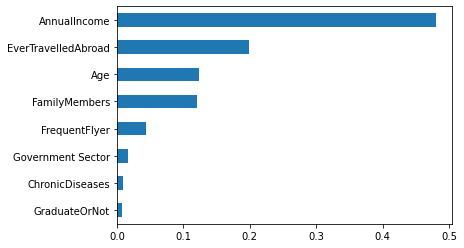

In [281]:
array = rf_clf.feature_importances_
d_f = pd.Series(array,index=x.columns)
d_f.sort_values().plot(kind = "barh")

In [282]:
df_1.columns

Index(['Age', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'TravelInsurance', 'Government Sector'],
      dtype='object')

In [283]:
x = df_1.drop(["Government Sector","GraduateOrNot","FrequentFlyer","ChronicDiseases"],axis=1)
y=df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [284]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

1.0

In [285]:
rf.score(x_test,y_test)

1.0

## Adaboost

In [286]:
x = df_1.drop("TravelInsurance",axis = 1)
y = df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [287]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [288]:
#training
y_pred_train = adb.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[931  27]
 [244 288]]
accuracy :  0.8181208053691276
classification report
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       958
           1       0.91      0.54      0.68       532

    accuracy                           0.82      1490
   macro avg       0.85      0.76      0.78      1490
weighted avg       0.84      0.82      0.80      1490



In [289]:
#testing
y_pred_test = adb.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[304  15]
 [ 73 105]]
accuracy :  0.8229376257545271
classification report
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       319
           1       0.88      0.59      0.70       178

    accuracy                           0.82       497
   macro avg       0.84      0.77      0.79       497
weighted avg       0.83      0.82      0.81       497



### Hyperparameter Tunning

In [290]:
adb_clf = AdaBoostClassifier()
parameter = {"n_estimators" : np.arange(10,50),
    "learning_rate" : np.arange(0,2,0.001)}
rmsc = RandomizedSearchCV(adb_clf,parameter,cv = 5)
rmsc.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

In [291]:
rmsc.best_estimator_

AdaBoostClassifier(learning_rate=1.556, n_estimators=14)

In [292]:
adb_clf = AdaBoostClassifier(learning_rate=1.556, n_estimators=14)
adb_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.556, n_estimators=14)

In [293]:
#training
y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy : ",accuracy)

cls_report = classification_report(y_train,y_pred_train)
print("classification report\n",cls_report)

confusion matrix
 [[929  29]
 [232 300]]
accuracy :  0.8248322147651007
classification report
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       958
           1       0.91      0.56      0.70       532

    accuracy                           0.82      1490
   macro avg       0.86      0.77      0.79      1490
weighted avg       0.84      0.82      0.81      1490



In [294]:
#testing
y_pred_test = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy : ",accuracy)

cls_report = classification_report(y_test,y_pred_test)
print("classification report\n",cls_report)

confusion matrix
 [[310   9]
 [ 70 108]]
accuracy :  0.8410462776659959
classification report
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       319
           1       0.92      0.61      0.73       178

    accuracy                           0.84       497
   macro avg       0.87      0.79      0.81       497
weighted avg       0.85      0.84      0.83       497



<AxesSubplot:>

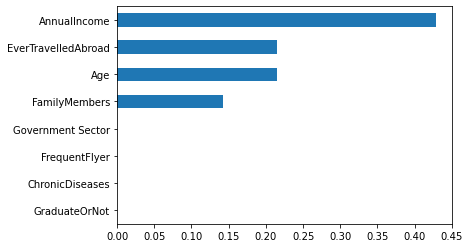

In [295]:
array = adb_clf.feature_importances_
s = pd.Series(array,index=x.columns)
s.sort_values().plot(kind = "barh")

In [296]:
x = df_1.drop(["Government Sector","ChronicDiseases"],axis=1)
y=df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [297]:
adb_model = AdaBoostClassifier()
adb_model.fit(x_train,y_train)
adb_model.score(x_train,y_train)

1.0

In [298]:
adb_model.score(x_test,y_test)

1.0

## SVM

In [299]:
x = df_1.drop("TravelInsurance",axis = 1)
y = df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [300]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [301]:
svc.score(x_train,y_train)

0.7718120805369127

In [302]:
svc.score(x_test,y_test)

0.7907444668008048

### hyperparameter Tunning

In [ ]:
# svc = SVC()
# parameter = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
#             "C":np.arange(1,100)}
# rmcv = RandomizedSearchCV(svc,parameter,cv= 5)
# rmcv.fit(x_train,y_train)

## Final Model

In [310]:
x = df_1.drop("TravelInsurance",axis = 1)
y = df_1["TravelInsurance"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

In [311]:
knn_gscv = KNeighborsClassifier()
parameter = {"n_neighbors":np.arange(2,10),
            "p" : [1,2]}
gscv = GridSearchCV(knn_gscv,parameter,cv = 5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=6, p=1)

In [316]:
knn_gscv = KNeighborsClassifier(n_neighbors=6, p=1)
knn_gscv.fit(x_train,y_train)
knn_gscv.score(x_train,y_train)

0.8328859060402685

In [317]:
knn_gscv.score(x_test,y_test)

0.8350100603621731

In [319]:
x_test.iloc[0:1]


,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Government Sector
1480,27,1,750000,4,0,1,0,1.0


In [341]:
y_test.iloc[0:1]

1480    0
Name: TravelInsurance, dtype: int64

In [336]:
list(x.columns)

['Age',
 'GraduateOrNot',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'FrequentFlyer',
 'EverTravelledAbroad',
 'Government Sector']

In [347]:
Age = 27
GraduateOrNot = "Yes"
AnnualIncome = 750000
FamilyMembers = 4
ChronicDiseases = 0
FrequentFlyer = "Yes"
EverTravelledAbroad = "No"
GovernmentSector = "Yes"

In [348]:
project_data = {'Graduate_Not':{"Yes":1,"No":0},
                'Frequent_Flyer':{"Yes":1,"No":0},
                'EverTravelled_Abroad':{"Yes":1,"No":0},
                'Government_Sector':{"Yes":1,"No":0},
                "columns":list(x.columns)}

In [349]:
test_array = np.zeros(len(x.columns))
test_array[0] = Age
test_array[1] = project_data['Graduate_Not'][GraduateOrNot]
test_array[2] = AnnualIncome
test_array[3] = FamilyMembers
test_array[4] = ChronicDiseases
test_array[5] = project_data["Frequent_Flyer"][FrequentFlyer]
test_array[6] = project_data['EverTravelled_Abroad'][EverTravelledAbroad]
test_array[7] = project_data["Government_Sector"][GovernmentSector]
knn_gscv.predict([test_array])[0]


0

In [351]:
import json
with open("Project_data","w") as f:
    json.dump(project_data,f)

In [352]:
import pickle
with open("knn_gscv","wb") as f:
    pickle.dump(knn_gscv,f)